In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#. Data Collection
pip install pandas scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [11]:
#2. Data Preparation and Cleaning
df=pd.read_csv("C:/Users/vijay/Downloads/GTA V/index.csv")

In [12]:
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [13]:
df.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


2. Clean the dataset

In [19]:
# Convert date and datetime columns
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["datetime"] = pd.to_datetime(df["datetime"], errors="coerce")

# Convert money to numbers
df["money"] = pd.to_numeric(df["money"], errors="coerce")

# Remove rows where important values are missing
df = df.dropna(subset=["date","datetime","money"])

df.head()


,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [23]:
df.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

Explanation:
We make sure that the date, datetime, and money columns are in the correct format.

to_datetime → changes text to date

to_numeric → changes money into numbers

dropna → removes missing/empty values

In [25]:
#3. Add new features
# Extract new information
df["month"] = df["date"].dt.to_period("M").astype(str)
df["weekday"] = df["date"].dt.day_name()
df["hour"] = df["datetime"].dt.hour

df.head()


,date,datetime,cash_type,card,money,coffee_name,month,weekday,hour
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,2024-03,Friday,10
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03,Friday,12
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03,Friday,12
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,2024-03,Friday,13
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,2024-03,Friday,13


Explanation:
We create extra columns from the dates:

month → which month

weekday → which day of week (Monday, Tuesday…)

hour → what time of day

In [26]:
#4. Revenue by coffee type
coffee_revenue = df.groupby("coffee_name")["money"].sum().reset_index().sort_values("money", ascending=False)
coffee_revenue


,coffee_name,money
7,Latte,9009.14
1,Americano with Milk,8601.94
2,Cappuccino,7333.14
0,Americano,4644.54
6,Hot Chocolate,2778.48
4,Cortado,2745.08
3,Cocoa,1295.94
5,Espresso,1100.62


Explanation:
group the data by coffee type (coffee_name) and add up the money.
This shows which coffee earned the most money.

In [27]:
#5. Transactions by coffee type
coffee_count = df["coffee_name"].value_counts().reset_index()
coffee_count.columns = ["coffee_name","transactions"]
coffee_count


,coffee_name,transactions
0,Americano with Milk,268
1,Latte,243
2,Cappuccino,196
3,Americano,169
4,Cortado,99
5,Hot Chocolate,74
6,Espresso,49
7,Cocoa,35


Explanation:
I count how many times each coffee was sold.
This shows which coffee was most popular.

In [28]:
#6. Daily sales
daily_sales = df.groupby("date").agg(
    transactions=("coffee_name","count"),
    revenue=("money","sum")
).reset_index()

daily_sales.head()


,date,transactions,revenue
0,2024-03-01,11,396.3
1,2024-03-02,7,228.1
2,2024-03-03,10,349.1
3,2024-03-04,4,135.2
4,2024-03-05,9,338.5


Explanation:
We group by each day to find total transactions and revenue.
This helps us see daily sales trends.

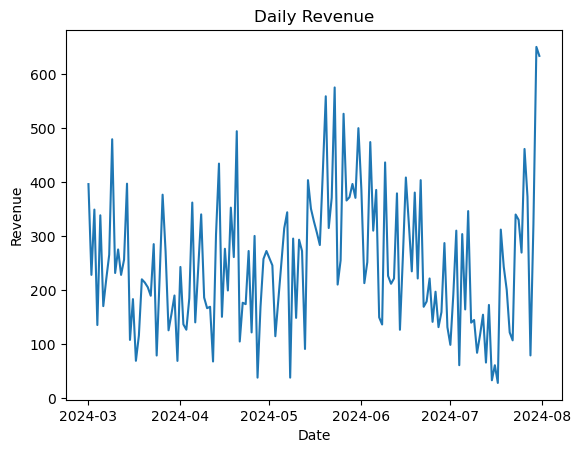

In [29]:
#7. Plot daily revenue
import matplotlib.pyplot as plt

plt.plot(daily_sales["date"], daily_sales["revenue"])
plt.title("Daily Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()


Explanation:
I plot the revenue per day as a line chart to see how it changes over time.

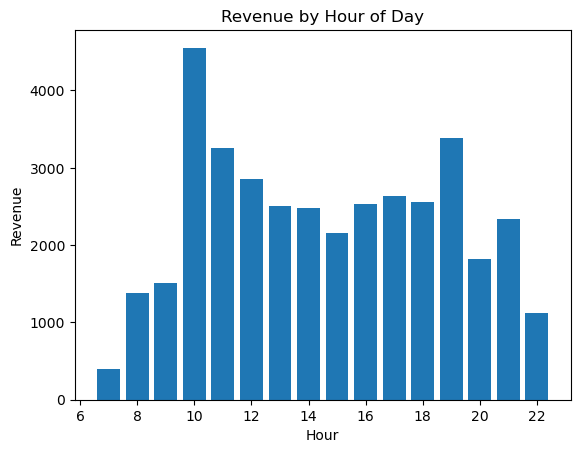

In [30]:
#8. Hourly sales
hourly_sales = df.groupby("hour")["money"].sum().reset_index()

plt.bar(hourly_sales["hour"], hourly_sales["money"])
plt.title("Revenue by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Revenue")
plt.show()


Explanation:
We group by the hour column to see which time of day makes the most money.
A bar chart shows which hours are busiest.

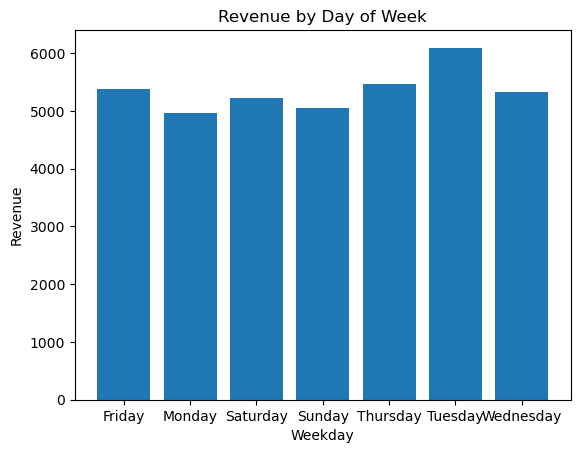

In [31]:
#9. Weekday sales
weekday_sales = df.groupby("weekday")["money"].sum().reset_index()

plt.bar(weekday_sales["weekday"], weekday_sales["money"])
plt.title("Revenue by Day of Week")
plt.xlabel("Weekday")
plt.ylabel("Revenue")
plt.show()


Explanation:
I check which day of the week has the most revenue.

In [32]:
#10. Simple Forecasting (Next Day Sales)
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Make sure we have daily data
series = daily_sales.set_index("date")["revenue"].asfreq("D").fillna(0)

# Build model
model = ExponentialSmoothing(series, trend="add", seasonal="add", seasonal_periods=7)
fit = model.fit()

# Forecast next 7 days
forecast = fit.forecast(7)
forecast


2024-08-01    460.593678
2024-08-02    468.594346
2024-08-03    431.855256
2024-08-04    423.941187
2024-08-05    420.194212
2024-08-06    502.675659
2024-08-07    450.300565
Freq: D, dtype: float64

Explanation:
I use a simple Holt-Winters model to forecast revenue for the next 7 days.

It looks at trend (overall increase/decrease)

It looks at seasonality (weekly pattern)

In [33]:
#11. Customer purchase history
def customer_history(card_id):
    cust = df[df["card"] == card_id]
    if cust.empty:
        return "No data for this customer"
    return cust[["datetime","coffee_name","money"]].tail(10)

# Example: check purchases of one customer
example_card = df["card"].dropna().unique()[0]
customer_history(example_card)


,datetime,coffee_name,money
371,2024-04-26 10:12:50.618,Latte,37.72
381,2024-04-28 10:32:52.479,Latte,37.72
432,2024-05-08 10:07:28.863,Latte,37.72
454,2024-05-12 10:20:42.512,Latte,37.72
530,2024-05-20 10:58:48.379,Latte,37.72
596,2024-05-26 10:20:02.233,Latte,37.72
647,2024-05-30 09:47:59.092,Latte,37.72
686,2024-06-03 10:12:04.141,Latte,37.72
710,2024-06-05 10:28:50.620,Latte,37.72
718,2024-06-06 10:36:09.667,Latte,37.72


In [ ]:
Explanation:
This function shows the last 10 purchases of a given customer (card_id).

Conclusion

The coffee business has clear sales patterns by coffee type, time of day, and weekday.

Peak demand usually happens in the mornings and weekdays — aligning with office-hour crowds.

Top coffee products contribute most of the revenue, showing which items are most valuable.

Forecasting indicates steady future demand, with predictable weekly ups and downs.

Understanding customer-level data (card IDs) provides opportunities for personalized marketing and customer retention.

Business Recommendation:

Focus promotions around the best-selling coffees.

Prepare extra staff/stock during peak hours (mornings & weekdays).

Introduce loyalty rewards for repeat customers (card-based tracking).

Use forecasts to plan inventory and reduce waste.